In [1]:
from speech_to_text import *
from speedup_functions import *
import numpy as np
import time
import sox
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
os.getcwd()

'/Users/anne/PycharmProjects/podcast-app/experiments'

In [2]:
os.chdir("..")

In [3]:
speaker_evaluation_df = pd.read_csv("experiments/dataset/speaker_speed_evaluation.csv", sep=";", decimal=",")

In [4]:
speaker_list = list(speaker_evaluation_df["speaker"])

In [5]:
speed_dic = {}
for speaker in speaker_list:
    filename = "experiments/dataset/speaker_extracts_mono/" + speaker + ".wav"
    filelength = sox.file_info.duration(filename)
    speed_dic[speaker] = list(speed_distribution(filename, filelength, chunk_size=4)) #TODO use deepspeech meta data

Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specified for 0 out of 3 files.The last 3 files will remain unformatted.
Input formats were only specif

['right so open borders is a league regime where', 'in slogan for any one can cage any one could eat a john anywhere', 'all thee with more complex complicated way that i like describe it as it less you', 'jail you are allowed to live and work every once so', "young murderer or still second reason but that's not what opened", 'verses about it if you are some one wearing one done anything where you belong', 'wal then you are free to live and work in any country that you']
['thank you very much for coming and i would typically', 'start out with a lengthy introduction of you know the', 'speakers and various accomplishments and know things that make them', 'notable and noteworthy but a toller told me that it', 'in these conversations it keep him to minutes and so i', "i don't think i can really go far down that list in this case so fight", 'to to say that you published fifteen bucks quite pale at least', 'the number of books in the stack here along with', 'actually i think second from the t

In [5]:
#speed_dic
#file_to_save = open("experiments/speed_dic", "wb")
#pickle.dump(speed_dic, file_to_save)
#file_to_save.close()
file_saved = open("experiments/speed_dic", "rb")
speed_dic = pickle.load(file_saved)
file_saved.close()


In [15]:
max_speeds = list(map(max, speed_dic.values()))
mean_speeds = list(map(np.mean, speed_dic.values()))
median_speeds = list(map(np.median, speed_dic.values()))


In [16]:
speaker_evaluation_df["max_speaker_speed"] = max_speeds
speaker_evaluation_df["mean_speaker_speed"] = mean_speeds
speaker_evaluation_df["median_speaker_speed"] = median_speeds
speaker_evaluation_df

,speaker,max_listening_speed,speaker_speed_feeling,max_speaker_speed,mean_speaker_speed,median_speaker_speed
0,caplan,2.00,7.0,21,16.428571,16.0
1,collison,2.50,7.6,21,16.076923,16.0
2,econ_talk_host,2.25,5.4,23,13.666667,12.0
3,econ_talk_interviewed,2.10,6.5,19,14.111111,13.0
4,galef,2.00,6.9,24,21.333333,21.0
5,hart,2.35,3.5,14,9.666667,9.5
6,manifold_host_1,2.00,6.0,27,17.800000,18.0
7,musk,2.05,6.2,16,11.333333,10.5
8,ord,1.90,7.1,23,18.466667,19.0
9,rogan,2.45,7.0,22,15.933333,16.0


In [8]:
# to numeric
#numeric_cols = speaker_evaluation_df.columns.drop('speaker')
#speaker_evaluation_df[numeric_cols] = speaker_evaluation_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

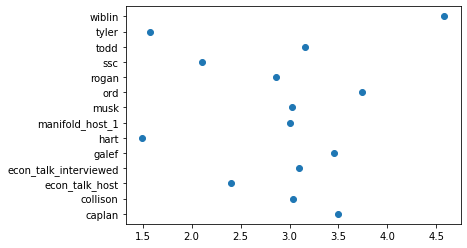

In [17]:
# how does the first impression correlate with max speedup
plt.scatter(x = speaker_evaluation_df["speaker_speed_feeling"] / speaker_evaluation_df["max_listening_speed"], y = speaker_evaluation_df["speaker"])

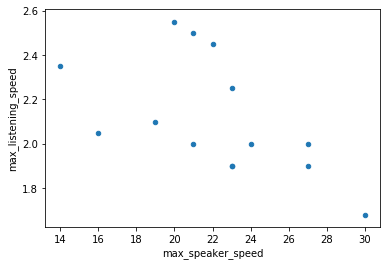

In [18]:
speaker_evaluation_df.plot.scatter(x = "max_speaker_speed", y = "max_listening_speed")

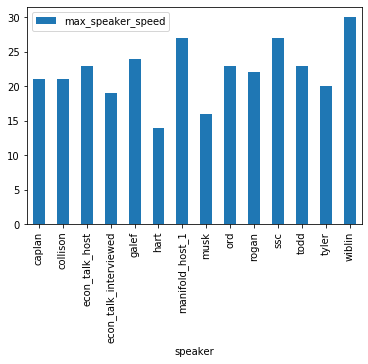

In [19]:
speaker_evaluation_df.plot.bar(x = "speaker", y =  "max_speaker_speed")

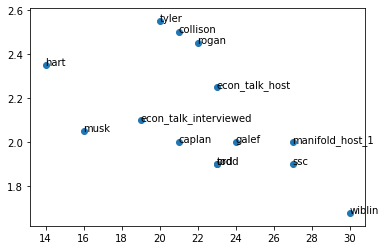

In [31]:
#sns.lmplot(x = "max_speaker_speed", y = "max_listening_speed", data = speaker_evaluation_df)
fig, ax = plt.subplots()
x = speaker_evaluation_df["max_speaker_speed"]
y = speaker_evaluation_df["max_listening_speed"]
ax.scatter(x = x, y = y)
for i, speaker in enumerate(speaker_evaluation_df["speaker"]):
    ax.annotate(speaker, (x[i], y[i]))

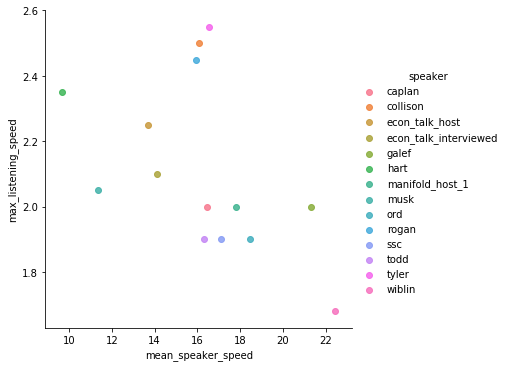

In [27]:
sns.lmplot(x = "mean_speaker_speed", y = "max_listening_speed", data = speaker_evaluation_df, hue="speaker")


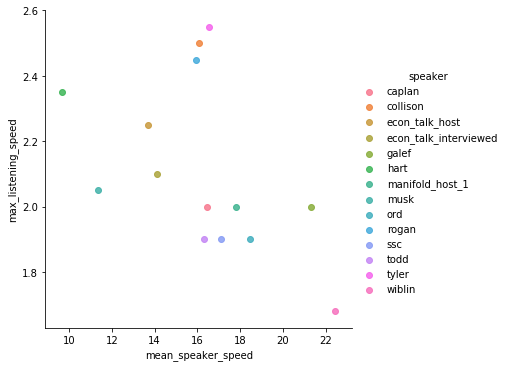

In [22]:
sns.lmplot(x = "mean_speaker_speed", y = "max_listening_speed", data = speaker_evaluation_df, hue="speaker")




In [25]:
speed_dic["tyler"]

[15, 18, 14, 20, 16, 15, 18, 17, 16]